In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
import csv
import pandas as pd
from pandas import read_csv

In [2]:
cols = [9, 99, 199]
files = ["madelon.csv", "madelonX4.csv", "madelonX9.csv", "madelonX16.csv"]
sizes = [1, 4, 9, 16]

runsA = 10 # number of loops with file-reading
runsB = 10_000 # number of loops with column-copying

results_fileread = pd.DataFrame(index=sizes)
results_columns = pd.DataFrame(index=sizes)

---
## Run profiling of the cpp files

* method_1: read-in without transposing, return transposed columns
* method_2: read_in transposing, return rows

---
The external library: file-read.

In [3]:
%%bash
g++ armadillo-fileread.cpp -pg
./a.out "madelon.csv" 10
gprof > armadillo-fileread.prof
./a.out "madelonX4.csv" 10
gprof > armadillo-fileread-X4.prof
./a.out "madelonX9.csv" 10
gprof > armadillo-fileread-X9.prof
./a.out "madelonX16.csv" 10
gprof > armadillo-fileread-X16.prof

10 runs in madelon.csv
10 runs in madelonX4.csv
10 runs in madelonX9.csv
10 runs in madelonX16.csv


In [3]:
results_fileread['armadillo'] = [2.19, 10.32, 27.74, 50.15]

---
My method (1): file-read.

In [31]:
%%bash
g++ my_method_1-fileread.cpp -pg
./a.out "madelon.csv" 10
gprof > my_method_1-fileread.prof
./a.out "madelonX4.csv" 10
gprof > my_method_1-fileread-X4.prof
./a.out "madelonX9.csv" 10
gprof > my_method_1-fileread-X9.prof
./a.out "madelonX16.csv" 10
gprof > my_method_1-fileread-X16.prof

In [4]:
results_fileread['my_method_1'] = [4.38, 19.47, 44.22, 78.93]

---
My method (2): file-read.

In [ ]:
%%bash
g++ my_method_2-fileread.cpp -pg
./a.out "madelon.csv"
gprof > my_method_2-fileread.prof
./a.out "madelonX4.csv"
gprof > my_method_2-fileread-X4.prof
./a.out "madelonX9.csv"
gprof > my_method_2-fileread-X9.prof
./a.out "madelonX16.csv"
gprof > my_method_2-fileread-X16.prof

In [5]:
results_fileread['my_method_2'] = [3.98, 16.94, 42.19, 82.78]

---
The external library: column-return.

In [ ]:
%%bash
g++ armadillo-columns.cpp -pg
./a.out "madelon.csv"
gprof > armadillo-columns.prof
./a.out "madelonX4.csv"
gprof > armadillo-columns-X4.prof
./a.out "madelonX9.csv"
gprof > armadillo-columns-X9.prof
./a.out "madelonX16.csv"
gprof > armadillo-columns-X16.prof

In [ ]:
results_columns = pd.DataFrame(index=sizes)

In [ ]:
results_columns['armadillo'] = [0.02, 0.08, 0.30, 0.58]

---
My method (1): column-return.

In [ ]:
%%bash
g++ my_method_1-columns.cpp -pg

In [60]:
%%bash
./a.out "madelon.csv"
gprof > my_method_1-columns.prof

In [61]:
%%bash
./a.out "madelonX4.csv"
gprof > my_method_1-columns-X4.prof

In [62]:
%%bash
./a.out "madelonX9.csv"
gprof > my_method_1-columns-X9.prof

In [63]:
%%bash
./a.out "madelonX16.csv"
gprof > my_method_1-columns-X16.prof

In [ ]:
results_columns['my_method_1'] = [13.93, 31.58, 59.31, 100.17]

---
My method (2): column-return.

In [ ]:
%%bash
g++ my_method_2-columns.cpp -pg

In [ ]:
%%bash
./a.out "madelon.csv"
gprof > my_method_2-columns.prof

In [ ]:
%%bash
./a.out "madelonX4.csv"
gprof > my_method_2-columns-X4.prof

In [ ]:
%%bash
./a.out "madelonX9.csv"
gprof > my_method_2-columns-X9.prof

In [ ]:
%%bash
./a.out "madelonX16.csv"
gprof > my_method_2-columns-X16.prof

In [ ]:
results_columns['my_method_2'] = []

---
## Time python functions

---
Read the csv file in using various methods. Repeat *runsA* number of times in a loop. 

In [7]:
def fileread_csv_reader(file):
    time_0 = time.time()
    for _ in range(runsA):
        M = []
        with open(file, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',',
                                quoting=csv.QUOTE_NONNUMERIC)
            for row in reader:
                M.append(row)
        M = np.array(M)
        del M
    time_diff = time.time() - time_0

    print(f"{runsA} runs in {file}: {time_diff} sec.")
    return time_diff

In [8]:
def fileread_pandas(file):
    time_0 = time.time()
    for _ in range(runsA):
        M = read_csv(file).values
        del M
    time_diff = time.time() - time_0

    print(f"{runsA} runs in {file}: {time_diff} sec.")
    return time_diff

In [9]:
def fileread_numpy1(file):
    time_0 = time.time()
    for _ in range(runsA):
        M = np.loadtxt(file, delimiter=',')
        del M
    time_diff = time.time() - time_0

    print(f"{runsA} runs in {file}: {time_diff} sec.")
    return time_diff

In [10]:
def fileread_numpy2(file):
    time_0 = time.time()
    for _ in range(runsA):
        M = np.genfromtxt(file, delimiter=',')
        del M
    time_diff = time.time() - time_0
    
    print(f"{runsA} runs in {file}: {time_diff} sec.")
    return time_diff

In [15]:
for i in range(2):
    file = files[i]
    size = sizes[i]
    result = fileread_csv_reader(file)
    results_fileread.loc[size, 'csv_reader'] = result

100 runs in madelon.csv: 19.492026329040527 sec.
100 runs in madelonX4.csv: 80.08922505378723 sec.


In [16]:
for i in range(2):
    file = files[i]
    size = sizes[i]
    result = fileread_pandas(file)
    results_fileread.loc[size, 'pandas'] = result

100 runs in madelon.csv: 14.132967233657837 sec.
100 runs in madelonX4.csv: 53.61871910095215 sec.


In [17]:
for i in range(2):
    file = files[i]
    size = sizes[i]
    result = fileread_numpy1(file)
    results_fileread.loc[size, 'numpy1'] = result

100 runs in madelon.csv: 54.420037508010864 sec.
100 runs in madelonX4.csv: 217.49280881881714 sec.


In [18]:
for i in range(2):
    file = files[i]
    size = sizes[i]
    result = fileread_numpy2(file)
    results_fileread.loc[size, 'numpy2'] = result

100 runs in madelon.csv: 82.33415722846985 sec.
100 runs in madelonX4.csv: 404.95741987228394 sec.


---
Return a copy of a handful of columns from the matrix. Repeat the column-return for *runsB* number of times.

In [24]:
def columns_csv_reader(file):
    M = []
    with open(file, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',',
                            quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            M.append(row)
    M = np.array(M)

    time_0 = time.time()
    for _ in range(runsB):
        column_bunch = M[:, cols].copy()
        del column_bunch
    time_diff = time.time() - time_0

    print(f"{runsB} runs in {file}: {time_diff} sec.")
    return time_diff

In [25]:
def columns_pandas(file):
    M = read_csv(file).values

    time_0 = time.time()
    for _ in range(runsB):
        column_bunch = M[:, cols].copy()
        del column_bunch
    time_diff = time.time() - time_0

    print(f"{runsB} runs in {file}: {time_diff} sec.")
    return time_diff

In [31]:
def columns_numpy1(file):
    M = np.loadtxt(file, delimiter=',')

    time_0 = time.time()
    for _ in range(runsB):
        column_bunch = M[:, cols].copy()
        del column_bunch
    time_diff = time.time() - time_0

    print(f"{runsB} runs in {file}: {time_diff} sec.")
    return time_diff

In [32]:
def columns_numpy2(file):
    M = np.genfromtxt(file, delimiter=',')
    
    time_0 = time.time()
    for _ in range(runsB):
        column_bunch = M[:, cols].copy()
        del column_bunch
    time_diff = time.time() - time_0

    print(f"{runsB} runs in {file}: {time_diff} sec.")
    return time_diff

In [28]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = columns_csv_reader(file)
    results_columns.loc[size, 'csv_reader'] = result

100000 runs in madelon.csv: 6.861221790313721 sec.
100000 runs in madelonX4.csv: 17.374897956848145 sec.
100000 runs in madelonX9.csv: 23.38420581817627 sec.
100000 runs in madelonX16.csv: 32.56147885322571 sec.


In [29]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = columns_pandas(file)
    results_columns.loc[size, 'pandas'] = result

100000 runs in madelon.csv: 1.6746242046356201 sec.
100000 runs in madelonX4.csv: 3.0879604816436768 sec.
100000 runs in madelonX9.csv: 4.817943811416626 sec.
100000 runs in madelonX16.csv: 6.3814778327941895 sec.


In [33]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = columns_numpy1(file)
    results_columns.loc[size, 'numpy1'] = result

100000 runs in madelon.csv: 6.623497247695923 sec.
100000 runs in madelonX4.csv: 15.588591814041138 sec.
100000 runs in madelonX9.csv: 23.77750849723816 sec.
100000 runs in madelonX16.csv: 31.722471714019775 sec.


In [34]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = columns_numpy2(file)
    results_columns.loc[size, 'numpy2'] = result

100000 runs in madelon.csv: 8.715791940689087 sec.
100000 runs in madelonX4.csv: 14.43964433670044 sec.
100000 runs in madelonX9.csv: 24.500673294067383 sec.
100000 runs in madelonX16.csv: 34.779449701309204 sec.


---

In [ ]:
results_fileread.to_pickle("results_fileread.pkl")
results_columns.to_pickle("results_columns.pkl")

In [ ]:
results_fileread = 

---
Plot the results

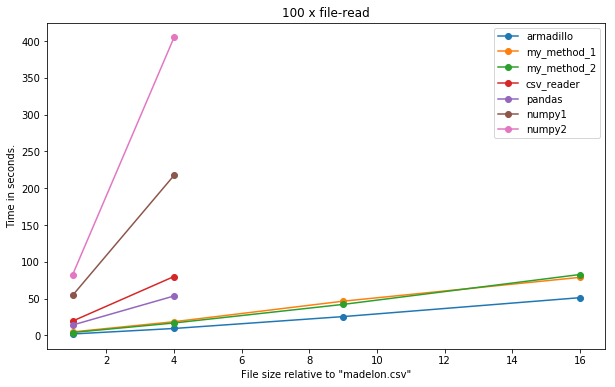

In [21]:
ax = results_fileread.reset_index().plot(x='index', y=results_fileread.columns, marker='o', figsize = (10,6), title=f'{runsA} x file-read')
ax.set_xlabel('File size relative to "madelon.csv"')
ax.set_ylabel(f'Time in seconds.')
plt.show()

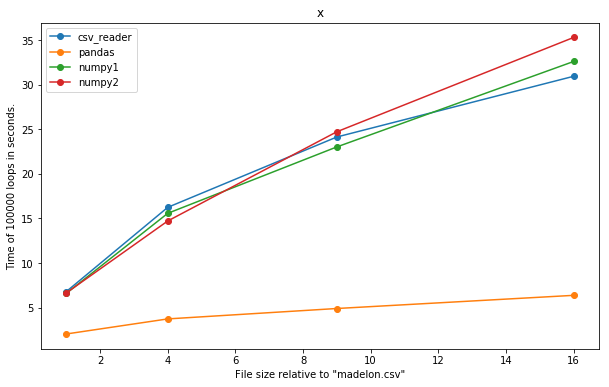

In [90]:
ax = results_columns.reset_index().plot(x='index', y=results_columns.columns, marker='o', figsize = (10,6), title=f'{runsB/1000}k x column-return')
ax.set_xlabel('File size relative to "madelon.csv"')
ax.set_ylabel(f'Time in seconds.')
plt.show()

---
Discusssed 18-01-2019

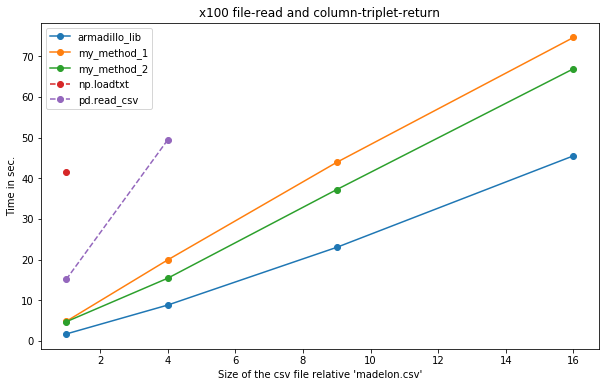

In [21]:
file_size = [1, 4, 9, 16]
time_external = [1.7, 8.8, 23.0, 45.5]
time_my_1 = [4.8, 19.9, 43.9, 74.6]
time_my_2 = [4.7, 15.4, 37.2, 66.9]
py_numpy = [41.6]
py_pandas = [15.1, 49.4]

plt.figure(figsize=(10,6))
plt.plot(file_size, time_external, "-o", label='armadillo_lib')
plt.plot(file_size, time_my_1, "-o", label="my_method_1")
plt.plot(file_size, time_my_2, "-o", label="my_method_2")
plt.plot(file_size[:len(py_numpy)], py_numpy, "--o", label="np.loadtxt")
plt.plot(file_size[:len(py_pandas)], py_pandas, "--o", label="pd.read_csv")

plt.xlabel("Size of the csv file relative to 'madelon.csv'")
plt.ylabel("Time in sec.")
plt.title("x100 file-read and column-triplet-return")
plt.legend()
plt.show()